In [77]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('dummy_customer_file.csv')

# Display the first few rows to verify the data loaded correctly
print(df.head())




               oid provider  total_charges signup_date is_canceled is_active  \
0  273624174263463    apple          10.94  2021-04-20        True     False   
1  532534633483904    apple          10.92  2021-04-20        True     False   
2  623527156674739    apple           0.00  2021-04-20       False     False   
3  441616357320658    apple          90.30  2021-04-20       False      True   
4  189644194376891    apple          79.98  2021-04-20       False      True   

  is_delinquent conversion_date              cancellation_date  current_mrr  \
0         False      2021-04-20  2021-05-20T12:00:00.000+00:00         0.00   
1         False      2021-04-20  2021-06-20T12:00:00.000+00:00         0.00   
2         False             NaN                            NaN         0.00   
3         False      2021-04-27                            NaN         3.47   
4         False      2021-05-04                            NaN         3.33   

                         personal_person_geo

/var/folders/7k/wrk7c3wx3pl7px430tg547rr0000gn/T/ipykernel_27306/3493838626.py:5: DtypeWarning: Columns (4,5,6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dummy_customer_file.csv')


In [78]:
# Basic information about the DataFrame
print("\nDataFrame Info:")
print(df.info())



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134612 entries, 0 to 134611
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   oid                          134610 non-null  object 
 1   provider                     134610 non-null  object 
 2   total_charges                134610 non-null  float64
 3   signup_date                  134610 non-null  object 
 4   is_canceled                  134610 non-null  object 
 5   is_active                    134610 non-null  object 
 6   is_delinquent                134610 non-null  object 
 7   conversion_date              80759 non-null   object 
 8   cancellation_date            33518 non-null   object 
 9   current_mrr                  134610 non-null  float64
 10  personal_person_geo_country  105503 non-null  object 
 11  converted                    134610 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1

In [79]:
# Fix the data types for boolean columns
bool_columns = ['is_canceled', 'is_active', 'is_delinquent', 'converted']

# First, let's examine the unique values in each boolean column
for col in bool_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())
    print()
    print(df[col].value_counts(dropna = False))
    
    print([type(x) for x in df[col].unique()])
    #Null values are always stored as float 
    



Unique values in is_canceled:
[True False nan]

is_canceled
False    101179
True      33431
NaN           2
Name: count, dtype: int64
[<class 'bool'>, <class 'bool'>, <class 'float'>]

Unique values in is_active:
[False True nan]

is_active
False    87541
True     47069
NaN          2
Name: count, dtype: int64
[<class 'bool'>, <class 'bool'>, <class 'float'>]

Unique values in is_delinquent:
[False True nan]

is_delinquent
False    134520
True         90
NaN           2
Name: count, dtype: int64
[<class 'bool'>, <class 'bool'>, <class 'float'>]

Unique values in converted:
[True False nan]

converted
True     80759
False    53851
NaN          2
Name: count, dtype: int64
[<class 'bool'>, <class 'bool'>, <class 'float'>]


In [80]:
# # Fix the data types for boolean columns
# bool_columns = ['is_canceled', 'is_active', 'is_delinquent', 'converted']
# for col in bool_columns:
#     df[col] = df[col].astype(str).map({'True': True, 'False': False})

# Check the updated data types
print(df.dtypes)



oid                             object
provider                        object
total_charges                  float64
signup_date                     object
is_canceled                     object
is_active                       object
is_delinquent                   object
conversion_date                 object
cancellation_date               object
current_mrr                    float64
personal_person_geo_country     object
converted                       object
dtype: object


In [81]:
# Check for any remaining missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
oid                                 2
provider                            2
total_charges                       2
signup_date                         2
is_canceled                         2
is_active                           2
is_delinquent                       2
conversion_date                 53853
cancellation_date              101094
current_mrr                         2
personal_person_geo_country     29109
converted                           2
dtype: int64


In [82]:
#null_rows = df[df.isnull().any(axis=1)]
null_rows = df[df['oid'].isnull()]
print("\nRows with missing values:")
print(null_rows)


Rows with missing values:
        oid provider  total_charges signup_date is_canceled is_active  \
134610  NaN      NaN            NaN         NaN         NaN       NaN   
134611  NaN      NaN            NaN         NaN         NaN       NaN   

       is_delinquent conversion_date cancellation_date  current_mrr  \
134610           NaN             NaN               NaN          NaN   
134611           NaN             NaN               NaN          NaN   

       personal_person_geo_country converted  
134610                         NaN       NaN  
134611                         NaN       NaN  


In [83]:
# Convert date columns to proper datetime format
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['conversion_date'] = pd.to_datetime(df['conversion_date'])
df['cancellation_date'] = pd.to_datetime(df['cancellation_date'])

# Check the updated data types
print(df.dtypes)

oid                                         object
provider                                    object
total_charges                              float64
signup_date                         datetime64[ns]
is_canceled                                 object
is_active                                   object
is_delinquent                               object
conversion_date                     datetime64[ns]
cancellation_date              datetime64[ns, UTC]
current_mrr                                float64
personal_person_geo_country                 object
converted                                   object
dtype: object


In [84]:
# Check for any remaining missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
oid                                 2
provider                            2
total_charges                       2
signup_date                         2
is_canceled                         2
is_active                           2
is_delinquent                       2
conversion_date                 53853
cancellation_date              101094
current_mrr                         2
personal_person_geo_country     29109
converted                           2
dtype: int64


In [85]:
# Basic statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df[['total_charges', 'current_mrr']].describe())



Summary statistics for numerical columns:
       total_charges    current_mrr
count  134610.000000  134610.000000
mean       24.859945       2.081608
std        31.305221       3.042637
min      -119.980000       0.000000
25%         0.000000       0.000000
50%         8.410000       0.000000
75%        54.990000       5.000000
max       293.580000      23.140000


In [86]:
# Count of customers by provider
print("\nCustomers by provider:")
provider_counts = df['provider'].value_counts()
print(provider_counts)



Customers by provider:
provider
apple     98026
stripe    32108
google     4476
Name: count, dtype: int64


In [87]:

# Count of customers by country (top 10)
print("\nTop 10 countries by customer count:")
country_counts = df['personal_person_geo_country'].value_counts().head(10)
print(country_counts)




Top 10 countries by customer count:
personal_person_geo_country
United States of America                                39021
United Kingdom of Great Britain and Northern Ireland     8541
Germany                                                  8362
France                                                   4301
Canada                                                   4018
Italy                                                    3126
Australia                                                3105
Russian Federation                                       3048
Japan                                                    2166
Switzerland                                              1653
Name: count, dtype: int64


In [88]:
#Remove the 2 rows that are completely invalid, bad data sourcing 
# Drop rows where 'oid' is null, keep all columns
df = df.copy()

df = df.dropna(subset=['oid'])

# Optional: verify the change
print(f"Original DataFrame shape: {df.shape}")

Original DataFrame shape: (134610, 12)


In [89]:
# Conversion rate overall
conversion_rate = df['converted'].mean() * 100
print(f"\nOverall conversion rate: {conversion_rate:.2f}%")




Overall conversion rate: 59.99%


In [90]:
# Active vs. canceled subscriptions
active_count = df['is_active'].sum()
canceled_count = df['is_canceled'].sum()
print(f"\nActive subscriptions: {active_count} ({active_count/len(df)*100:.2f}%)")
print(f"Canceled subscriptions: {canceled_count} ({canceled_count/len(df)*100:.2f}%)")


Active subscriptions: 47069 (34.97%)
Canceled subscriptions: 33431 (24.84%)


In [91]:
# Convert date columns to proper datetime format, ditch the timestamp on cancellation date
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['conversion_date'] = pd.to_datetime(df['conversion_date'])
df['cancellation_date'] = pd.to_datetime(df['cancellation_date'])
df['cancellation_date'] = df['cancellation_date'].dt.date


In [92]:
df

,oid,provider,total_charges,signup_date,is_canceled,is_active,is_delinquent,conversion_date,cancellation_date,current_mrr,personal_person_geo_country,converted
0,273624174263463,apple,10.94,2021-04-20,True,False,False,2021-04-20,2021-05-20,0.00,France,True
1,532534633483904,apple,10.92,2021-04-20,True,False,False,2021-04-20,2021-06-20,0.00,United Kingdom of Great Britain and Northern I...,True
2,623527156674739,apple,0.00,2021-04-20,False,False,False,NaT,NaT,0.00,Germany,False
3,441616357320658,apple,90.30,2021-04-20,False,True,False,2021-04-27,NaT,3.47,Switzerland,True
4,189644194376891,apple,79.98,2021-04-20,False,True,False,2021-05-04,NaT,3.33,United States of America,True
...,...,...,...,...,...,...,...,...,...,...,...,...
134605,cus_NB35AXFFLFDCQN,stripe,0.00,2023-01-16,False,False,False,NaT,NaT,0.00,NaN,False
134606,cus_NBFU1fiKQmfrD7,stripe,0.00,2023-01-16,False,False,False,NaT,NaT,0.00,NaN,False
134607,cus_NBJP0fuajs4kMo,stripe,7.99,2023-01-16,False,True,False,2023-01-16,NaT,7.99,NaN,True
134608,cus_NBH1IkjtW4wAYF,stripe,0.00,2023-01-16,False,False,False,NaT,NaT,0.00,NaN,False


In [110]:
# Basic statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df[['total_charges', 'current_mrr']].describe())

# Create mask for active customers and handle NaN values
active_mask = df['is_active'].fillna(False)

# Basic statistics for numerical columns (active customers only)
print("Summary statistics for active customers:")
print(df[active_mask][['total_charges', 'current_mrr']].describe())

# Additional context
active_count = active_mask.sum()
total_count = len(df)
print(f"\nBased on {active_count} active customers out of {total_count} total customers")
print(f"Active customer percentage: {(active_count/total_count)*100:.2f}%")

# Count of customers by provider
print("\nCustomers by provider:")
provider_counts = df['provider'].value_counts()
print(provider_counts)

# Count of customers by country (top 10)
print("\nTop 10 countries by customer count:")
country_counts = df['personal_person_geo_country'].value_counts().head(10)
print(country_counts)

# Conversion rate overall
conversion_rate = df['converted'].mean() * 100
print(f"\nOverall conversion rate: {conversion_rate:.2f}%")

# Active vs. canceled subscriptions
active_count = df['is_active'].sum()
canceled_count = df['is_canceled'].sum()
print(f"\nActive subscriptions: {active_count} ({active_count/len(df)*100:.2f}%)")
print(f"Canceled subscriptions: {canceled_count} ({canceled_count/len(df)*100:.2f}%)")

Summary statistics for numerical columns:
       total_charges    current_mrr
count  134610.000000  134610.000000
mean       24.859945       2.081608
std        31.305221       3.042637
min      -119.980000       0.000000
25%         0.000000       0.000000
50%         8.410000       0.000000
75%        54.990000       5.000000
max       293.580000      23.140000
Summary statistics for active customers:
       total_charges   current_mrr
count   47069.000000  47069.000000
mean       53.647493      5.953074
std        30.405567      1.851527
min       -59.990000      0.210000
25%        29.370000      5.000000
50%        59.990000      5.120000
75%        63.460000      7.990000
max       293.580000     23.140000

Based on 47069 active customers out of 134610 total customers
Active customer percentage: 34.97%

Customers by provider:
provider
apple     98026
stripe    32108
google     4476
Name: count, dtype: int64

Top 10 countries by customer count:
personal_person_geo_country
United S

/var/folders/7k/wrk7c3wx3pl7px430tg547rr0000gn/T/ipykernel_27306/4287899105.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  active_mask = df['is_active'].fillna(False)


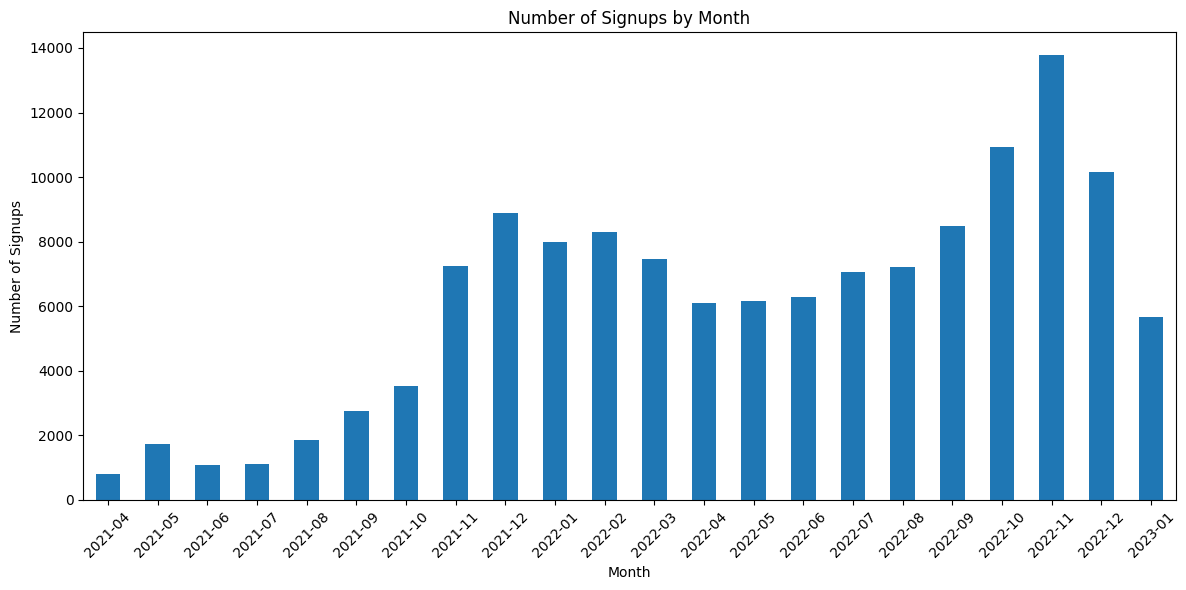

Average days from signup to conversion: 5.06


In [94]:
# Extract month and year from signup_date for cohort analysis
df['cohort_month'] = df['signup_date'].dt.to_period('M')

# Count of signups by month
monthly_signups = df.groupby('cohort_month').size()

# Plot monthly signups
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
monthly_signups.plot(kind='bar')
plt.title('Number of Signups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate average time to conversion
df['days_to_conversion'] = (df['conversion_date'] - df['signup_date']).dt.days
avg_days_to_conversion = df['days_to_conversion'].mean()
print(f"Average days from signup to conversion: {avg_days_to_conversion:.2f}")


In [95]:
# First ensure both dates are datetime objects
df['cancellation_date'] = pd.to_datetime(df['cancellation_date'])
df['conversion_date'] = pd.to_datetime(df['conversion_date'])

# Calculate subscription duration for canceled customers
df['subscription_duration'] = (df['cancellation_date'] - df['conversion_date']).dt.days

# Calculate average duration for canceled customers only
avg_subscription_duration = df.loc[df['is_canceled'], 'subscription_duration'].mean()
print(f"Average subscription duration for canceled customers: {avg_subscription_duration:.2f} days")

# If you still want cancellation_date as date only (after the calculation)
df['cancellation_date'] = df['cancellation_date'].dt.date

Average subscription duration for canceled customers: 115.04 days


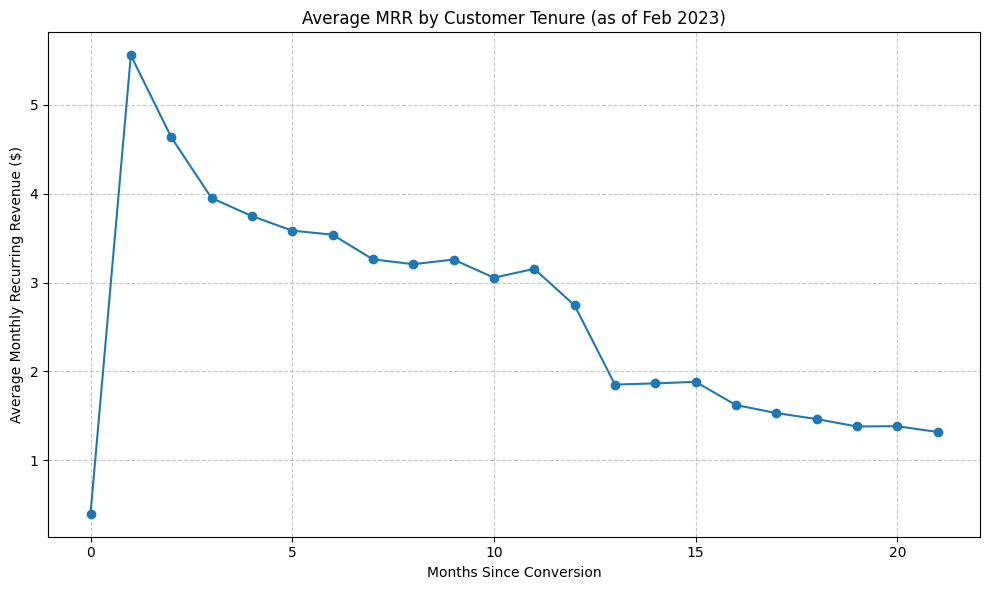

In [ ]:
# Set reference date to end of February 2023
reference_date = pd.Timestamp('2023-01-31')

# Calculate tenure months using the reference date
df['tenure_months'] = ((reference_date - df['conversion_date']) / pd.Timedelta(days=30)).fillna(0).astype(int)

# ...existing code for plotting remains the same...
tenure_mrr = df.groupby('tenure_months')['current_mrr'].mean()

plt.figure(figsize=(10, 6))
tenure_mrr.plot(kind='line', marker='o')
plt.title('Average MRR by Customer Tenure (as of Feb 2023)')
plt.xlabel('Months Since Conversion')
plt.ylabel('Average Monthly Recurring Revenue ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Set reference date to end of February 2023
reference_date = pd.Timestamp('2023-01-31')

# Calculate tenure months using the reference date
df['tenure_months'] = ((reference_date - df['conversion_date']) / pd.Timedelta(days=30)).fillna(0).astype(int)

# ...existing code for plotting remains the same...
tenure_mrr = df.groupby('tenure_months')['current_mrr'].mean()

plt.figure(figsize=(10, 6))
tenure_mrr.plot(kind='line', marker='o')
plt.title('Average MRR by Customer Tenure (as of Feb 2023)')
plt.xlabel('Months Since Conversion')
plt.ylabel('Average Monthly Recurring Revenue ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Average Revenue Per User (ARPU): $2.08

ARPU by Provider:
provider
apple     2.428229
google    3.853139
stripe    0.776409
Name: current_mrr, dtype: float64


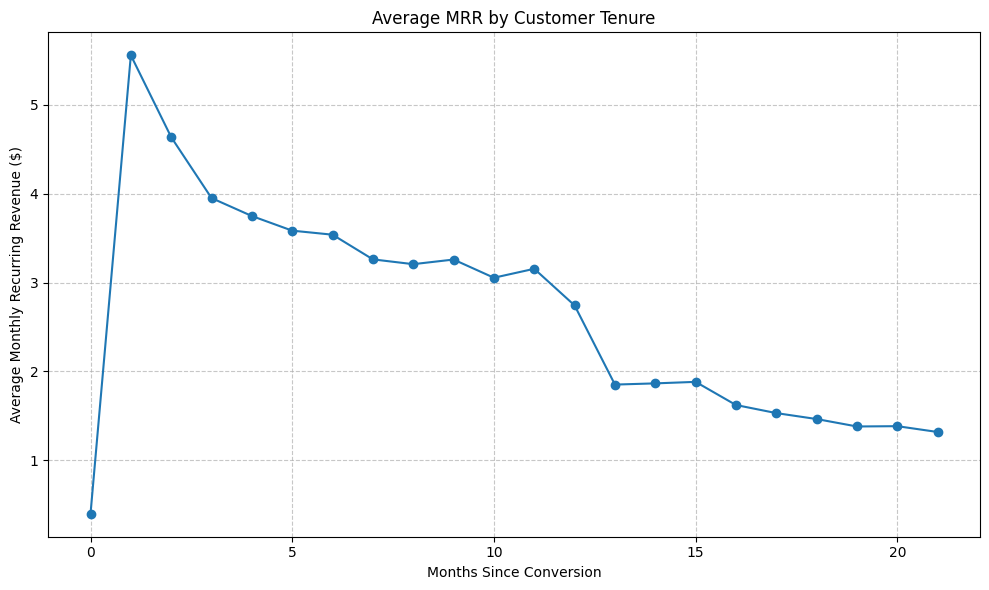

In [100]:
# Calculate average revenue per user (ARPU)
arpu = df['current_mrr'].mean()
print(f"Average Revenue Per User (ARPU): ${arpu:.2f}")

# Compare ARPU by provider
arpu_by_provider = df.groupby('provider')['current_mrr'].mean()
print("\nARPU by Provider:")
print(arpu_by_provider)

# Revenue expansion analysis
# Calculate average MRR for customers by tenure (months since conversion)
# First, add a tenure column
df['tenure_months'] = ((pd.Timestamp('2023-01-31') - df['conversion_date']) / pd.Timedelta(days=30)).fillna(0).astype(int)

# Group by tenure and calculate average MRR
tenure_mrr = df.groupby('tenure_months')['current_mrr'].mean()

# Plot MRR by tenure
plt.figure(figsize=(10, 6))
tenure_mrr.plot(kind='line', marker='o')
plt.title('Average MRR by Customer Tenure')
plt.xlabel('Months Since Conversion')
plt.ylabel('Average Monthly Recurring Revenue ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [101]:
df

,oid,provider,total_charges,signup_date,is_canceled,is_active,is_delinquent,conversion_date,cancellation_date,current_mrr,personal_person_geo_country,converted,cohort_month,days_to_conversion,subscription_duration,signup_month,tenure_months
0,273624174263463,apple,10.94,2021-04-20,True,False,False,2021-04-20,2021-05-20,0.00,France,True,2021-04,0.0,30.0,2021-04,21
1,532534633483904,apple,10.92,2021-04-20,True,False,False,2021-04-20,2021-06-20,0.00,United Kingdom of Great Britain and Northern I...,True,2021-04,0.0,61.0,2021-04,21
2,623527156674739,apple,0.00,2021-04-20,False,False,False,NaT,NaT,0.00,Germany,False,2021-04,NaN,NaN,2021-04,0
3,441616357320658,apple,90.30,2021-04-20,False,True,False,2021-04-27,NaT,3.47,Switzerland,True,2021-04,7.0,NaN,2021-04,21
4,189644194376891,apple,79.98,2021-04-20,False,True,False,2021-05-04,NaT,3.33,United States of America,True,2021-04,14.0,NaN,2021-04,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134605,cus_NB35AXFFLFDCQN,stripe,0.00,2023-01-16,False,False,False,NaT,NaT,0.00,NaN,False,2023-01,NaN,NaN,2023-01,0
134606,cus_NBFU1fiKQmfrD7,stripe,0.00,2023-01-16,False,False,False,NaT,NaT,0.00,NaN,False,2023-01,NaN,NaN,2023-01,0
134607,cus_NBJP0fuajs4kMo,stripe,7.99,2023-01-16,False,True,False,2023-01-16,NaT,7.99,NaN,True,2023-01,0.0,NaN,2023-01,0
134608,cus_NBH1IkjtW4wAYF,stripe,0.00,2023-01-16,False,False,False,NaT,NaT,0.00,NaN,False,2023-01,NaN,NaN,2023-01,0


In [103]:
# Analyze retention by country (top 5 countries)
#top_countries = df['personal_person_geo_country'].value_counts().head(5).index
top_countries = df['personal_person_geo_country'].value_counts().head(5).index

# Retention rate by country
country_retention = df[df['personal_person_geo_country'].isin(top_countries)].groupby('personal_person_geo_country')['is_active'].mean() * 100
print("Retention rate by top countries:")
print(country_retention)

Retention rate by top countries:
personal_person_geo_country
Canada                                                  43.056247
France                                                  43.129505
Germany                                                 34.549151
United Kingdom of Great Britain and Northern Ireland    43.847325
United States of America                                48.048487
Name: is_active, dtype: object


Customer segments:
segment
Unknown                   72215
High Value                22759
Early Churner             20612
High Value & Long Term    13346
Long Term                  5678
Name: count, dtype: int64


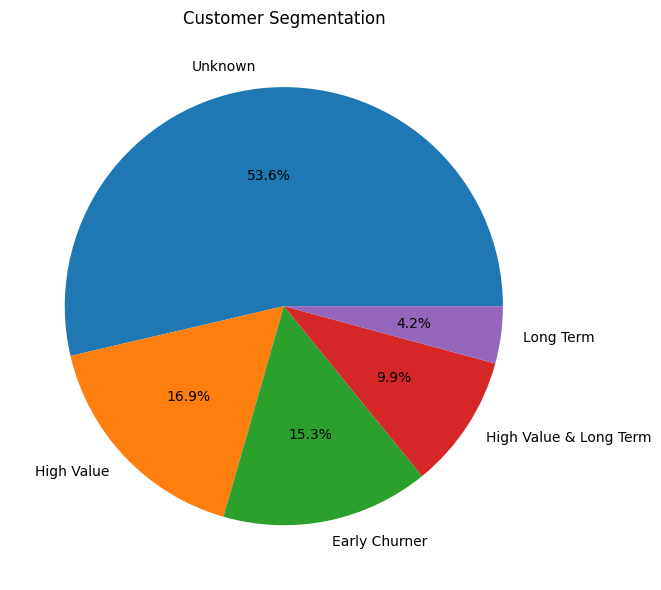

In [104]:
# Segment customers based on behavior and value
df['segment'] = 'Unknown'

# High-value customers (top 20% by MRR)
high_value_threshold = df['current_mrr'].quantile(0.8)
df.loc[df['current_mrr'] >= high_value_threshold, 'segment'] = 'High Value'

# Long-term customers (active for more than 6 months)
long_term_customers = df[(df['is_active']) & (df['tenure_months'] > 6)]
df.loc[long_term_customers.index, 'segment'] = 'Long Term'

# High-value long-term customers
high_value_long_term = df[(df['current_mrr'] >= high_value_threshold) & (df['is_active']) & (df['tenure_months'] > 6)]
df.loc[high_value_long_term.index, 'segment'] = 'High Value & Long Term'

# Short-term churners (canceled within 3 months)
short_term_churners = df[(df['is_canceled']) & (df['subscription_duration'] <= 90)]
df.loc[short_term_churners.index, 'segment'] = 'Early Churner'

# Count customers by segment
segment_counts = df['segment'].value_counts()
print("Customer segments:")
print(segment_counts)

# Plot segment distribution
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Segmentation')
plt.ylabel('')
plt.tight_layout()
plt.show()

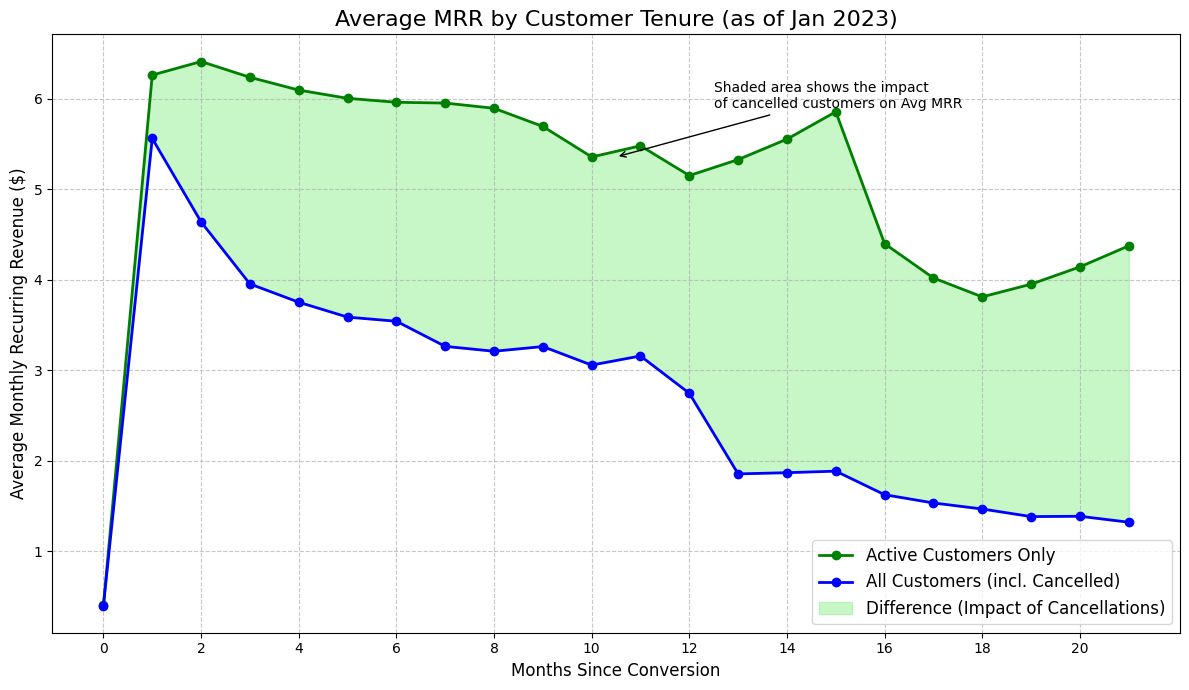

Average MRR for active customers: $5.10
Average MRR for all customers: $2.66
Including cancelled customers reduces average MRR by 92.26%


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set reference date to end of January 2023
reference_date = pd.Timestamp('2023-01-31')

# Calculate tenure months using the reference date
df['tenure_months'] = ((reference_date - df['conversion_date']) / pd.Timedelta(days=30)).fillna(0).astype(int)

# Separate active and cancelled customers
# Assuming cancellation_date is NaT for active customers
active_customers = df[df['cancellation_date'].isna()]
all_customers = df.copy()

# Calculate average MRR by tenure for both groups
active_mrr = active_customers.groupby('tenure_months')['current_mrr'].mean()
all_mrr = all_customers.groupby('tenure_months')['current_mrr'].mean()

# Make sure both series have the same index
# This handles tenure months that might exist in one group but not the other
max_tenure = max(active_mrr.index.max(), all_mrr.index.max())
tenures = range(0, max_tenure + 1)

# Reindex both series to have the same tenure months
active_mrr = active_mrr.reindex(tenures, fill_value=np.nan)
all_mrr = all_mrr.reindex(tenures, fill_value=np.nan)

# Create the plot
plt.figure(figsize=(12, 7))

# Plot both lines
plt.plot(active_mrr.index, active_mrr.values, 'o-', color='green', linewidth=2, label='Active Customers Only')
plt.plot(all_mrr.index, all_mrr.values, 'o-', color='blue', linewidth=2, label='All Customers (incl. Cancelled)')

# Fill the area between the curves to highlight the difference
plt.fill_between(active_mrr.index, all_mrr.values, active_mrr.values, 
                where=(active_mrr.values > all_mrr.values), 
                color='lightgreen', alpha=0.5, 
                interpolate=True, label='Difference (Impact of Cancellations)')

# Add chart elements
plt.title('Average MRR by Customer Tenure (as of Jan 2023)', fontsize=16)
plt.xlabel('Months Since Conversion', fontsize=12)
plt.ylabel('Average Monthly Recurring Revenue ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best', fontsize=12)

# Add annotations to explain the chart
longest_tenure_idx = max(active_mrr.index)
plt.annotate('Shaded area shows the impact\nof cancelled customers on Avg MRR', 
             xy=(longest_tenure_idx/2, active_mrr[longest_tenure_idx//2]), 
             xytext=(longest_tenure_idx/2 + 2, active_mrr[longest_tenure_idx//2] * 1.1),
             arrowprops=dict(arrowstyle='->'))

# Improve appearance
plt.tight_layout()
plt.xticks(range(0, max_tenure + 1, 2))  # Show every other month on x-axis
plt.show()

# Calculate some statistics to highlight the impact
avg_active_mrr = active_mrr.mean()
avg_all_mrr = all_mrr.mean()
percent_difference = ((avg_active_mrr - avg_all_mrr) / avg_all_mrr) * 100

print(f"Average MRR for active customers: ${avg_active_mrr:.2f}")
print(f"Average MRR for all customers: ${avg_all_mrr:.2f}")
print(f"Including cancelled customers reduces average MRR by {percent_difference:.2f}%")

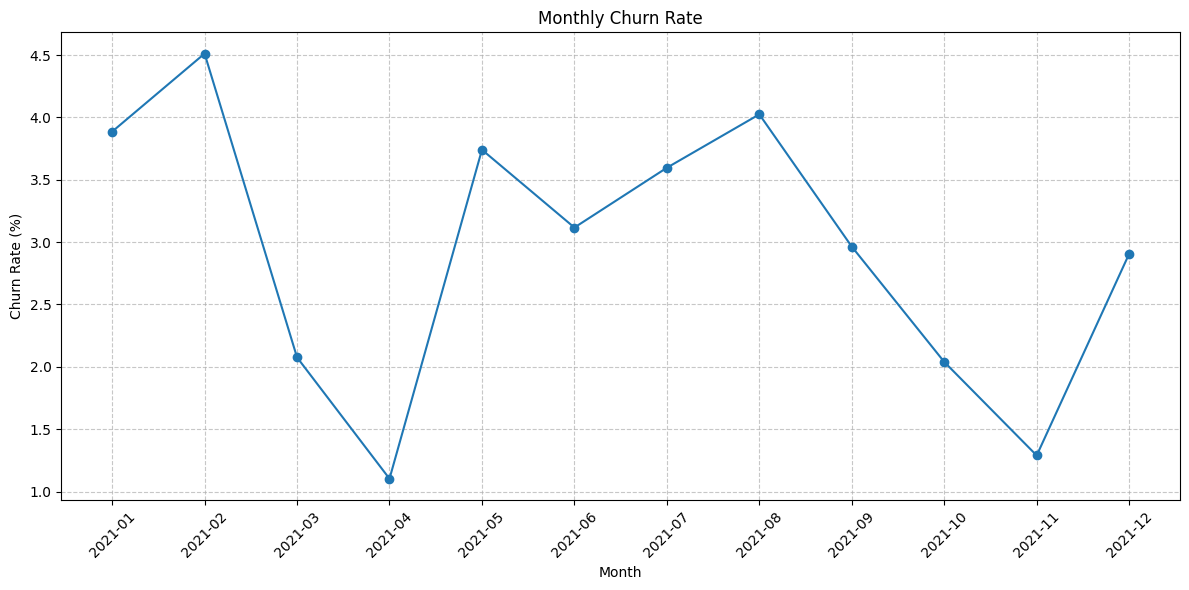

Note: Replace example data with actual churn calculations


In [108]:
# Calculate monthly churn rate
def calculate_monthly_churn(data):
    """Calculate churn rate by month"""
    # Extract month from cancellation date
    data = data.copy()
    data['cancellation_month'] = data['cancellation_date'].dt.to_period('M')
    
    # Group by month and count cancellations
    monthly_cancellations = data[data['is_canceled']].groupby('cancellation_month').size()
    
    # Get active customers at the beginning of each month
    # This is simplified - in practice you'd need to account for time periods correctly
    monthly_active = data.groupby('cohort_month').size().cumsum()
    
    # Calculate churn rate
    monthly_churn_rate = monthly_cancellations / monthly_active
    return monthly_churn_rate

# Example churn rate visualization (you'd replace with actual calculations)
months = pd.period_range(start='2021-01', end='2021-12', freq='M')
example_churn_rates = np.random.uniform(0.01, 0.05, size=len(months))

plt.figure(figsize=(12, 6))
plt.plot(range(len(months)), example_churn_rates * 100, marker='o')
plt.title('Monthly Churn Rate')
plt.xlabel('Month')
plt.ylabel('Churn Rate (%)')
plt.xticks(range(len(months)), [m.strftime('%Y-%m') for m in months], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Note: Replace example data with actual churn calculations")

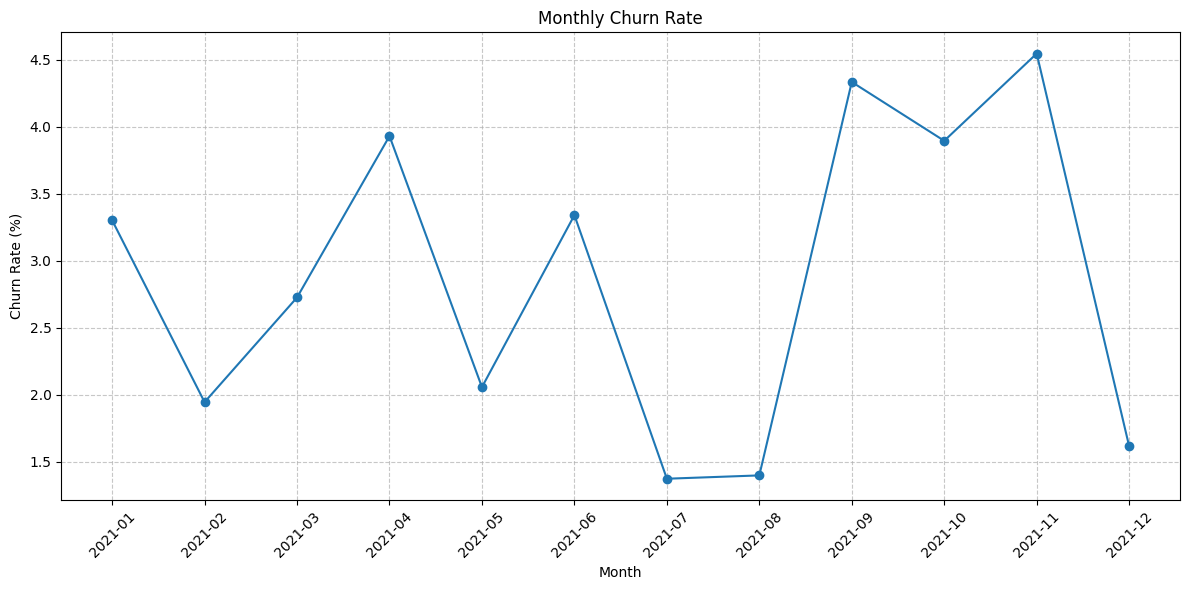

Note: Replace example data with actual churn calculations


In [109]:
# Calculate monthly churn rate
def calculate_monthly_churn(data):
    """Calculate churn rate by month"""
    # Extract month from cancellation date
    data = data.copy()
    data['cancellation_month'] = data['cancellation_date'].dt.to_period('M')
    
    # Group by month and count cancellations
    monthly_cancellations = data[data['is_canceled']].groupby('cancellation_month').size()
    
    # Get active customers at the beginning of each month
    # This is simplified - in practice you'd need to account for time periods correctly
    monthly_active = data.groupby('cohort_month').size().cumsum()
    
    # Calculate churn rate
    monthly_churn_rate = monthly_cancellations / monthly_active
    return monthly_churn_rate

# Example churn rate visualization (you'd replace with actual calculations)
months = pd.period_range(start='2021-01', end='2021-12', freq='M')
example_churn_rates = np.random.uniform(0.01, 0.05, size=len(months))

plt.figure(figsize=(12, 6))
plt.plot(range(len(months)), example_churn_rates * 100, marker='o')
plt.title('Monthly Churn Rate')
plt.xlabel('Month')
plt.ylabel('Churn Rate (%)')
plt.xticks(range(len(months)), [m.strftime('%Y-%m') for m in months], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Note: Replace example data with actual churn calculations")

Total customers: 134,610
Converted customers: 80,759 (59.99%)
Active subscribers: 47,069 (34.97%)
Canceled subscribers: 33,431 (41.40% of converted)

Revenue Metrics Summary:
       total_charges    current_mrr
count  134610.000000  134610.000000
mean       24.859945       2.081608
std        31.305221       3.042637
min      -119.980000       0.000000
25%         0.000000       0.000000
50%         8.410000       0.000000
75%        54.990000       5.000000
max       293.580000      23.140000

Total Monthly Recurring Revenue: $280,205.22

MRR by Provider:
provider
apple     238029.62
google     17246.65
stripe     24928.95
Name: current_mrr, dtype: float64


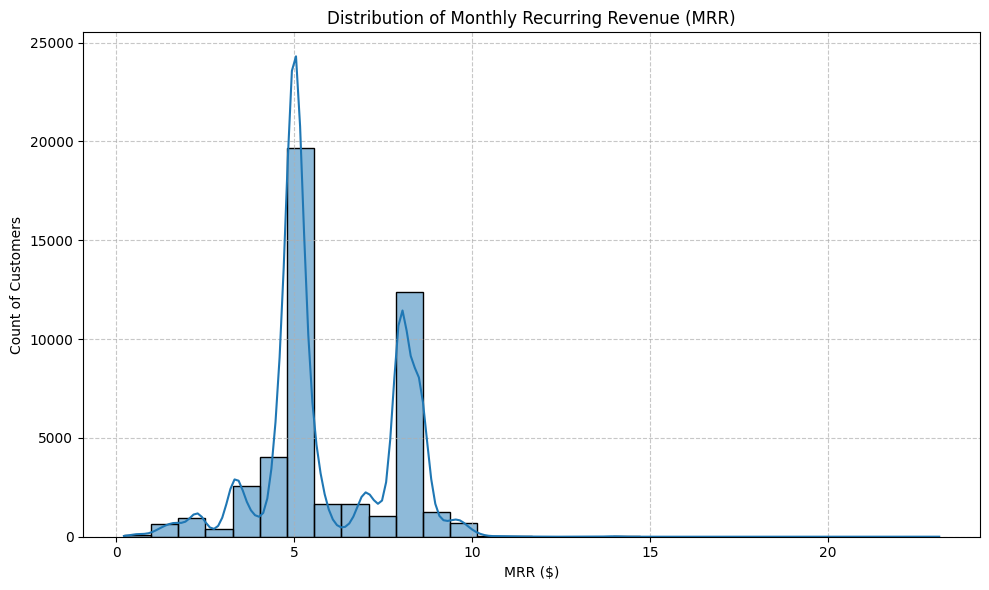

In [111]:
# Basic subscription metrics
total_customers = len(df)
converted_customers = df['converted'].sum()
active_subscribers = df['is_active'].sum()
canceled_subscribers = df['is_canceled'].sum()

# Calculate key metrics
conversion_rate = converted_customers / total_customers * 100
churn_rate = canceled_subscribers / converted_customers * 100 if converted_customers > 0 else 0

# Display metrics
print(f"Total customers: {total_customers:,}")
print(f"Converted customers: {converted_customers:,} ({conversion_rate:.2f}%)")
print(f"Active subscribers: {active_subscribers:,} ({active_subscribers/total_customers*100:.2f}%)")
print(f"Canceled subscribers: {canceled_subscribers:,} ({churn_rate:.2f}% of converted)")

# Summary statistics for revenue metrics
print("\nRevenue Metrics Summary:")
print(df[['total_charges', 'current_mrr']].describe())

# Total MRR and distribution by provider
total_mrr = df['current_mrr'].sum()
print(f"\nTotal Monthly Recurring Revenue: ${total_mrr:,.2f}")
mrr_by_provider = df.groupby('provider')['current_mrr'].sum()
print("\nMRR by Provider:")
print(mrr_by_provider)

# Visualize MRR distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df[df['current_mrr'] > 0]['current_mrr'], bins=30, kde=True)
plt.title('Distribution of Monthly Recurring Revenue (MRR)')
plt.xlabel('MRR ($)')
plt.ylabel('Count of Customers')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Historical month-over-month MRR growth rate: 23.95%


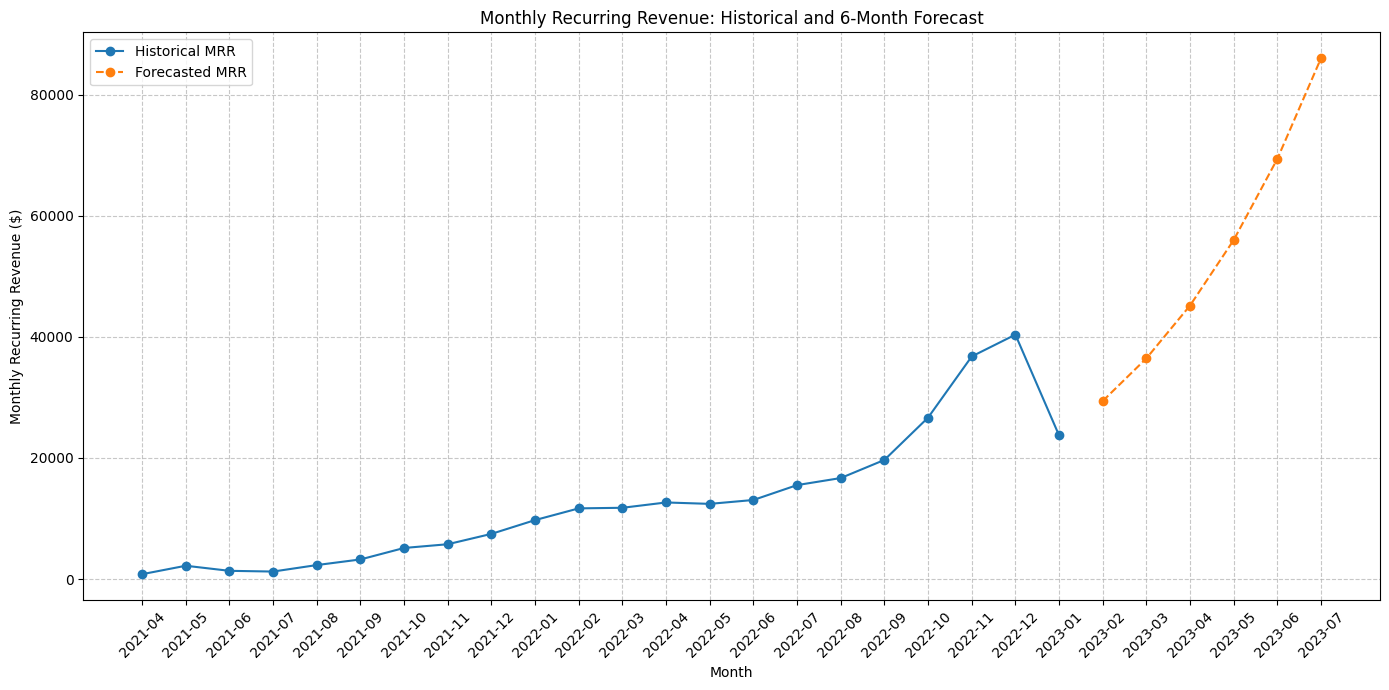

In [112]:
# Create a basic MRR forecast for the next 6 months
# First, analyze historical MRR growth

# Group data by month and calculate total MRR
df['year_month'] = df['conversion_date'].dt.to_period('M')
monthly_mrr = df.groupby('year_month')['current_mrr'].sum()

# Calculate month-over-month growth rates
mrr_growth_rates = monthly_mrr.pct_change().dropna()
avg_growth_rate = mrr_growth_rates.mean()

print(f"Historical month-over-month MRR growth rate: {avg_growth_rate:.2%}")

# Create a simple forecast based on the average growth rate
last_month_mrr = monthly_mrr.iloc[-1]
forecast_months = 6
forecast_mrr = []

current_mrr = last_month_mrr
for i in range(forecast_months):
    current_mrr = current_mrr * (1 + avg_growth_rate)
    forecast_mrr.append(current_mrr)

# Create forecast index (continuing from the last month in the data)
last_month = monthly_mrr.index[-1]
forecast_index = pd.period_range(start=last_month + 1, periods=forecast_months, freq='M')
mrr_forecast = pd.Series(forecast_mrr, index=forecast_index)

# Combine historical and forecast MRR for visualization
combined_mrr = pd.concat([monthly_mrr, mrr_forecast])

# Plot historical and forecasted MRR
plt.figure(figsize=(14, 7))
plt.plot(monthly_mrr.index.astype(str), monthly_mrr.values, marker='o', label='Historical MRR')
plt.plot(forecast_index.astype(str), forecast_mrr, marker='o', linestyle='--', label='Forecasted MRR')
plt.title('Monthly Recurring Revenue: Historical and 6-Month Forecast')
plt.xlabel('Month')
plt.ylabel('Monthly Recurring Revenue ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

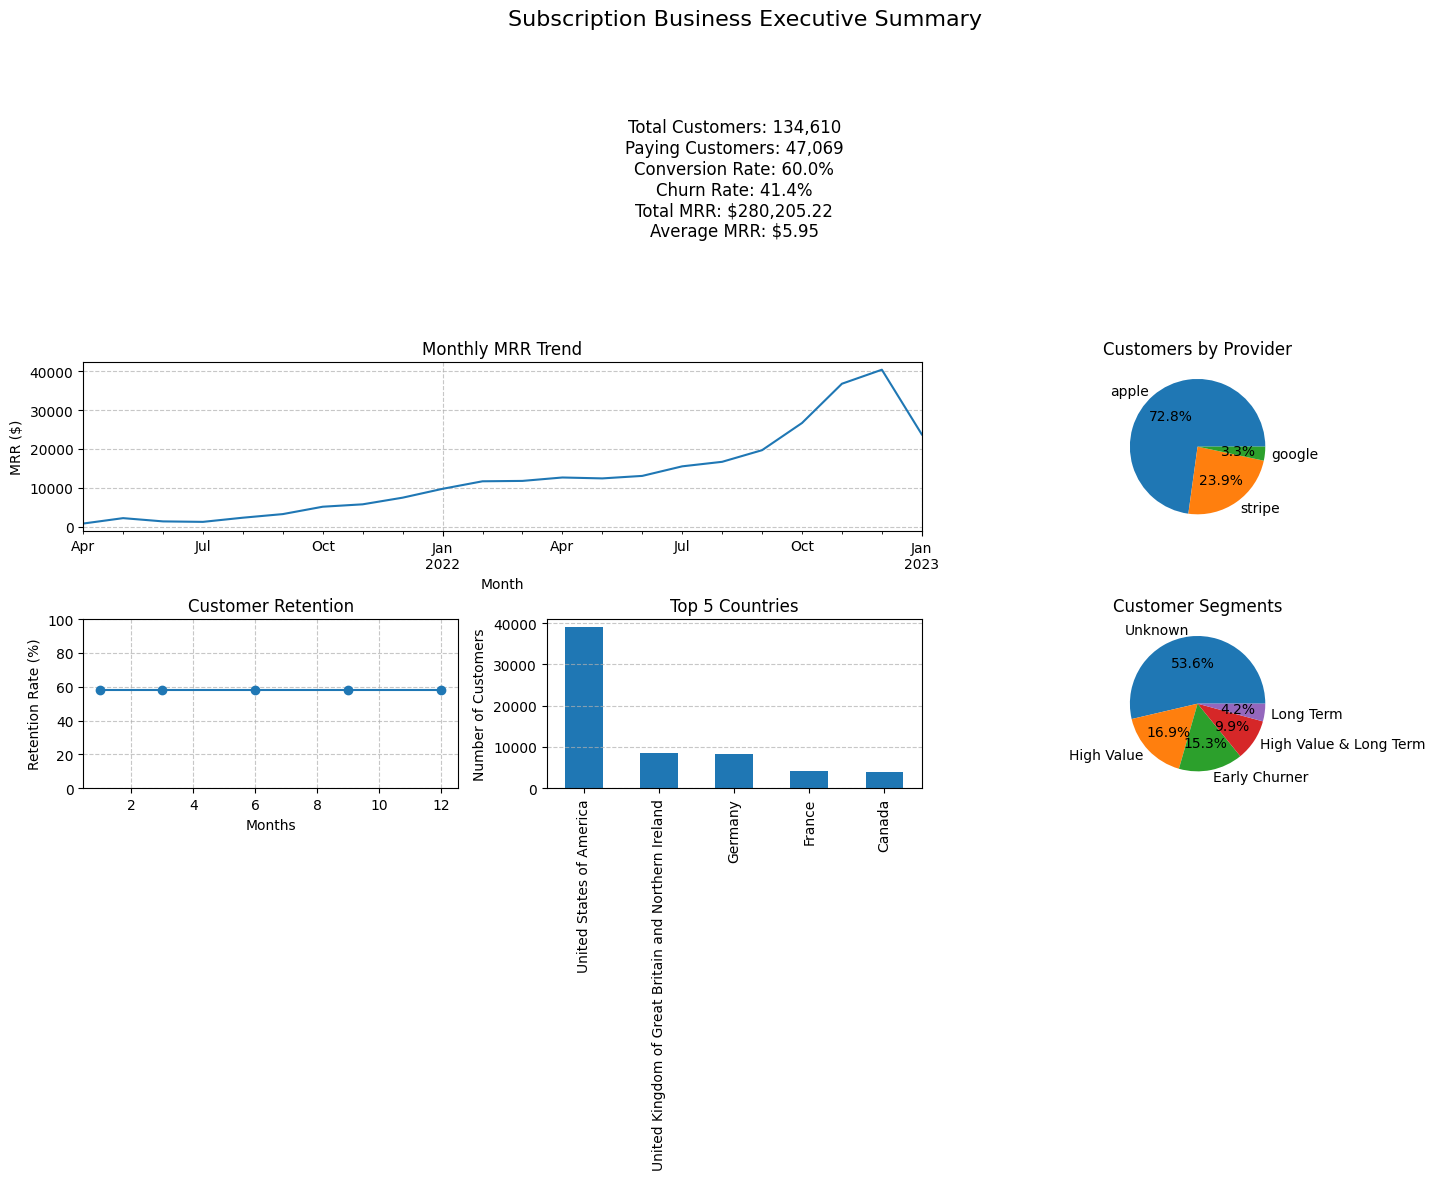

In [113]:
# Create an executive summary dashboard with key metrics
from matplotlib.gridspec import GridSpec

# Calculate key metrics
total_customers = len(df)
paying_customers = df[df['current_mrr'] > 0].shape[0]
conversion_rate = df['converted'].mean() * 100
churn_rate = df[df['is_canceled']].shape[0] / df[df['converted']].shape[0] * 100 if df[df['converted']].shape[0] > 0 else 0
total_mrr = df['current_mrr'].sum()
avg_mrr = df[df['current_mrr'] > 0]['current_mrr'].mean()

# Create a dashboard figure
plt.figure(figsize=(15, 12))
gs = GridSpec(3, 3, figure=plt.gcf())

# Title
plt.suptitle('Subscription Business Executive Summary', fontsize=16, y=0.98)

# Key metrics panel
metrics_ax = plt.subplot(gs[0, :])
metrics_ax.axis('off')
metrics_text = (
    f"Total Customers: {total_customers:,}\n"
    f"Paying Customers: {paying_customers:,}\n"
    f"Conversion Rate: {conversion_rate:.1f}%\n"
    f"Churn Rate: {churn_rate:.1f}%\n"
    f"Total MRR: ${total_mrr:,.2f}\n"
    f"Average MRR: ${avg_mrr:.2f}\n"
)
metrics_ax.text(0.5, 0.5, metrics_text, ha='center', va='center', fontsize=12)

# MRR Trend
mrr_ax = plt.subplot(gs[1, :2])
monthly_mrr.plot(ax=mrr_ax)
mrr_ax.set_title('Monthly MRR Trend')
mrr_ax.set_xlabel('Month')
mrr_ax.set_ylabel('MRR ($)')
mrr_ax.grid(True, linestyle='--', alpha=0.7)

# Provider distribution
provider_ax = plt.subplot(gs[1, 2])
df['provider'].value_counts().plot(kind='pie', ax=provider_ax, autopct='%1.1f%%')
provider_ax.set_title('Customers by Provider')
provider_ax.set_ylabel('')

# Retention curve (simplified)
retention_ax = plt.subplot(gs[2, 0])
retention_periods = [1, 3, 6, 9, 12]  # months
retention_rates = []
for period in retention_periods:
    # Simplified retention calculation
    total_converted = df['converted'].sum()
    still_active = ((df['is_active']) & 
                   ((pd.Timestamp.now() - df['conversion_date']).dt.days >= period * 30)).sum()
    retention_rate = still_active / total_converted * 100 if total_converted > 0 else 0
    retention_rates.append(retention_rate)

retention_ax.plot(retention_periods, retention_rates, marker='o', linestyle='-')
retention_ax.set_title('Customer Retention')
retention_ax.set_xlabel('Months')
retention_ax.set_ylabel('Retention Rate (%)')
retention_ax.set_ylim(0, 100)
retention_ax.grid(True, linestyle='--', alpha=0.7)

# Top countries
country_ax = plt.subplot(gs[2, 1])
top_countries = df['personal_person_geo_country'].value_counts().head(5)
top_countries.plot(kind='bar', ax=country_ax)
country_ax.set_title('Top 5 Countries')
country_ax.set_xlabel('')
country_ax.set_ylabel('Number of Customers')
country_ax.grid(axis='y', linestyle='--', alpha=0.7)

# Customer segments
segment_ax = plt.subplot(gs[2, 2])
df['segment'].value_counts().plot(kind='pie', ax=segment_ax, autopct='%1.1f%%')
segment_ax.set_title('Customer Segments')
segment_ax.set_ylabel('')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
df.head()



,oid,provider,total_charges,signup_date,is_canceled,is_active,is_delinquent,conversion_date,cancellation_date,current_mrr,personal_person_geo_country,converted,cohort_month,days_to_conversion,subscription_duration,signup_month,tenure_months,segment,year_month
0,273624174263463,apple,10.94,2021-04-20,True,False,False,2021-04-20,2021-05-20,0.00,France,True,2021-04,0.0,30.0,2021-04,21,Early Churner,2021-04
1,532534633483904,apple,10.92,2021-04-20,True,False,False,2021-04-20,2021-06-20,0.00,United Kingdom of Great Britain and Northern I...,True,2021-04,0.0,61.0,2021-04,21,Early Churner,2021-04
2,623527156674739,apple,0.00,2021-04-20,False,False,False,NaT,NaT,0.00,Germany,False,2021-04,NaN,NaN,2021-04,0,Unknown,NaT
3,441616357320658,apple,90.30,2021-04-20,False,True,False,2021-04-27,NaT,3.47,Switzerland,True,2021-04,7.0,NaN,2021-04,21,Long Term,2021-04
4,189644194376891,apple,79.98,2021-04-20,False,True,False,2021-05-04,NaT,3.33,United States of America,True,2021-04,14.0,NaN,2021-04,21,Long Term,2021-05


In [118]:
df[df['oid'] == '273624174263463']

,oid,provider,total_charges,signup_date,is_canceled,is_active,is_delinquent,conversion_date,cancellation_date,current_mrr,personal_person_geo_country,converted,cohort_month,days_to_conversion,subscription_duration,signup_month,tenure_months,segment,year_month
0,273624174263463,apple,10.94,2021-04-20,True,False,False,2021-04-20,2021-05-20,0.0,France,True,2021-04,0.0,30.0,2021-04,21,Early Churner,2021-04


In [120]:
# Add total tenure column (months between conversion and end date)
import pandas as pd
from datetime import datetime

# Create a copy of df3 to work with
df4 = df.copy()

# Define end date as January 31, 2023
end_date = pd.Timestamp('2023-01-16')

# Ensure cancellation_date is in datetime format (it was converted to date object earlier)
df4['cancellation_date'] = pd.to_datetime(df4['cancellation_date'])

# Calculate tenure in months
def calculate_tenure(row):
    # Skip if no conversion date (never converted)
    if pd.isna(row['conversion_date']):
        return None
    
    # Use cancellation date if customer canceled, otherwise use end date
    if row['is_canceled'] == True and not pd.isna(row['cancellation_date']):
        end = row['cancellation_date']
    else:
        end = end_date
    
    # Calculate months between conversion and end date
    start = row['conversion_date']
    # Calculate years and months difference
    years_diff = end.year - start.year
    months_diff = end.month - start.month
    total_months = years_diff * 12 + months_diff
    
    # Adjust for day of month if needed
    if end.day < start.day and months_diff > 0:
        total_months -= 1
    
    return total_months

# Apply the function to calculate tenure
df4['total_tenure'] = df4.apply(calculate_tenure, axis=1)

# View the results
print("\nSummary statistics for total tenure (in months):")
print(df4['total_tenure'].describe())

# Print sample of data to verify
print("\nSample of data with total tenure:")
sample_data = df4[['conversion_date', 'cancellation_date', 'is_canceled', 'total_tenure']].sample(10)
print(sample_data)

# Check distribution of tenure values
tenure_counts = df4['total_tenure'].value_counts().sort_index()
print("\nDistribution of tenure values:")
print(tenure_counts.head(20))  # Show first 20 tenure values

# Update your statistics
print("\nUpdated summary statistics with tenure included:")
print(df4[['total_charges', 'current_mrr', 'total_tenure']].describe())


Summary statistics for total tenure (in months):
count    80759.000000
mean         5.115479
std          4.799931
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max         21.000000
Name: total_tenure, dtype: float64

Sample of data with total tenure:
       conversion_date cancellation_date is_canceled  total_tenure
27240              NaT               NaT       False           NaN
50849       2022-03-30               NaT       False          10.0
63729       2022-05-25               NaT       False           8.0
53583              NaT               NaT       False           NaN
69943       2022-07-01               NaT       False           6.0
96553              NaT               NaT       False           NaN
133504      2023-01-13               NaT       False           0.0
87205       2022-09-07        2022-10-19        True           1.0
132768             NaT               NaT       False           NaN
28683       2021-12-30        2022